In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn import metrics

digits = load_digits()

In [2]:
data = digits.images
data.shape

#Mostra que há 1797 imagens (8 por 8 imagens para uma dimensionalidade de 64)
print("Forma de dados da imagem" , digits.data.shape)
#Mostra que há 1797 amostras (inteiros de 0 a 9)
print("Forma de dados do rótulo", digits.target.shape)
#Resposta certa para cada digito
print(digits.data)

Forma de dados da imagem (1797, 64)
Forma de dados do rótulo (1797,)
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.20)

In [53]:
lr = LogisticRegression(solver='liblinear', multi_class='ovr')
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9098497495826378

In [51]:
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
svm.score(X_test,y_test)

0.5125208681135225

In [52]:
rf = RandomForestClassifier(n_estimators=5)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8547579298831386

In [16]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)

for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]):
    print(train_index, test_index)

[2 3 4 5 6 7 8] [0 1]
[0 1 4 5 6 7 8] [2 3]
[0 1 2 3 6 7 8] [4 5]
[0 1 2 3 4 5 8] [6 7]
[0 1 2 3 4 5 6 7] [8]


In [18]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=3)

scores_logistic = []
scores_svm = []
scores_rf = []

for train_index, test_index in folds.split(digits.data,digits.target):
    X_train, X_test, y_train, y_test = digits.data[train_index], digits.data[test_index], \
                                       digits.target[train_index], digits.target[test_index]
    scores_logistic.append(get_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X_train, X_test, y_train, y_test))  
    scores_svm.append(get_score(SVC(gamma='auto'), X_train, X_test, y_train, y_test))
    scores_rf.append(get_score(RandomForestClassifier(n_estimators=40), X_train, X_test, y_train, y_test))

In [19]:
from sklearn.model_selection import cross_val_score

cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), digits.data, digits.target,cv=5)

cross_val_score(SVC(gamma='auto'), digits.data, digits.target,cv=5)

cross_val_score(RandomForestClassifier(n_estimators=40),digits.data, digits.target,cv=5)

array([0.93611111, 0.9       , 0.95264624, 0.95821727, 0.92479109])

In [57]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [58]:
param_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],'C': [1, 10, 100, 1000]},{'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
scores = ['precision', 'recall']

In [59]:
for score in scores:
    grid = GridSearchCV(SVC(), param_grid, scoring='%s_macro' %score)
    grid.fit(digits.data,digits.target)
    print("Melhores parametros", grid.best_params_)
    print("Scores no desenvolvimento", grid.cv_results_['mean_test_score'])
    print(grid.cv_results_['std_test_score'])

Melhores parametros {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Scores no desenvolvimento [0.97460445 0.95091977 0.97469484 0.96298922 0.97469484 0.96409576
 0.97469484 0.96409576 0.94984555 0.94984555 0.94984555 0.94984555]
[0.01263888 0.0219365  0.01077443 0.02093182 0.01077443 0.01562298
 0.01077443 0.01562298 0.02062072 0.02062072 0.02062072 0.02062072]
Melhores parametros {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
Scores no desenvolvimento [0.97222406 0.94703886 0.97222406 0.95980771 0.97222406 0.96209264
 0.97222406 0.96209264 0.94754859 0.94754859 0.94754859 0.94754859]
[0.01488968 0.02343974 0.01337742 0.02312948 0.01337742 0.01663588
 0.01337742 0.01663588 0.02075347 0.02075347 0.02075347 0.02075347]


In [60]:
for score in scores:
    grid = RandomizedSearchCV(SVC(), param_grid, scoring='%s_macro' %score)
    grid.fit(digits.data,digits.target)
    print("Melhores parametros", grid.best_params_)
    print("Scores no desenvolvimento", grid.cv_results_['mean_test_score'])
    print(grid.cv_results_['std_test_score'])

Melhores parametros {'kernel': 'rbf', 'gamma': 0.001, 'C': 1000}
Scores no desenvolvimento [0.97469484 0.94984555 0.97469484 0.94984555 0.96298922 0.95091977
 0.97469484 0.94984555 0.96409576 0.97460445]
[0.01077443 0.02062072 0.01077443 0.02062072 0.02093182 0.0219365
 0.01077443 0.02062072 0.01562298 0.01263888]
Melhores parametros {'kernel': 'rbf', 'gamma': 0.001, 'C': 100}
Scores no desenvolvimento [0.94754859 0.95980771 0.97222406 0.96209264 0.94754859 0.94754859
 0.94703886 0.96209264 0.94754859 0.97222406]
[0.02075347 0.02312948 0.01337742 0.01663588 0.02075347 0.02075347
 0.02343974 0.01663588 0.02075347 0.01337742]


Matrix de confusão:
[[56  0  0  0  0  1  1  0  1  0]
 [ 0 50  0  2  0  0  0  0  4  5]
 [ 2  0 56  0  0  0  0  0  0  1]
 [ 0  1  0 50  0  3  0  2  5  0]
 [ 0  1  0  0 56  0  1  0  0  2]
 [ 0  1  1  0  0 58  1  0  0  0]
 [ 0  0  0  0  0  0 60  0  0  0]
 [ 0  1  0  0  0  0  0 56  3  0]
 [ 0  7  0  0  0  2  0  0 49  0]
 [ 1  2  0  1  0  1  0  1  0 54]]


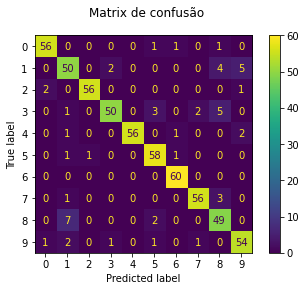

Matrix de confusão:
[[29  0  0  0  0 30  0  0  0  0]
 [ 0 25  0  0  0 36  0  0  0  0]
 [ 0  0 23  0  0 36  0  0  0  0]
 [ 0  0  0 50  0 11  0  0  0  0]
 [ 0  0  0  0 31 29  0  0  0  0]
 [ 0  0  0  0  0 61  0  0  0  0]
 [ 0  0  0  0  0 34 26  0  0  0]
 [ 0  0  0  0  0 35  0 25  0  0]
 [ 0  0  0  0  0 53  0  0  5  0]
 [ 0  0  0  2  0 26  0  0  0 32]]


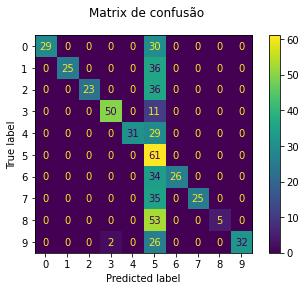

Matrix de confusão:
[[56  0  0  0  1  1  0  0  1  0]
 [ 2 41  1  0  2  1  0  0  5  9]
 [ 1  3 54  1  0  0  0  0  0  0]
 [ 0  0  4 48  0  2  0  0  7  0]
 [ 3  0  0  0 53  0  1  2  0  1]
 [ 0  0  0  0  0 57  0  0  1  3]
 [ 0  0  0  0  0  0 59  0  1  0]
 [ 0  0  0  0  1  1  0 58  0  0]
 [ 1  6  4  3  1  0  0  1 40  2]
 [ 0  0  0  1  3  9  0  1  0 46]]


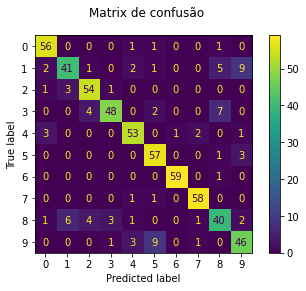

In [69]:
disp = metrics.plot_confusion_matrix(lr, X_test,y_test)
disp.figure_.suptitle("Matrix de confusão")
print(f"Matrix de confusão:\n{disp.confusion_matrix}")
plt.show()

disp = metrics.plot_confusion_matrix(svm, X_test,y_test)
disp.figure_.suptitle("Matrix de confusão")
print(f"Matrix de confusão:\n{disp.confusion_matrix}")
plt.show()

disp = metrics.plot_confusion_matrix(rf, X_test,y_test)
disp.figure_.suptitle("Matrix de confusão")
print(f"Matrix de confusão:\n{disp.confusion_matrix}")
plt.show()

# Após a etapa de treinamento, analise o modelo respondendo as questões a seguir.
### a) Qual a acurácia do modelo?
Testei com 3 classificadores diferentes o LogisticRegression, SVC e o RandomFlorestClassifier e sua precisão foi respectivamente 0,9; 0,51 e 0,85

### b) O modelo teve uma boa performance?
Construindo a matrix de confusão baseando-se nos classificadores LogisticRegression e o RandomFlorestClassifier acredito que o modelo teve uma performance boa, porém no svc não foi muito boa. 

### c) Quais foram os melhores parâmetros escolhidos?
Os melhores parâmetros escolhidos foram definidos por 2 metodos sendo eles: Os definidos pelo GridSearch:
"{'kernel': 'rbf', 'gamma': 0.001, 'C': 1000}" e " {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}" 
Os definidos pelo RandomizedSearch:
"{'kernel': 'rbf', 'gamma': 0.001, 'C': 1000}" e "{'kernel': 'rbf', 'gamma': 0.001, 'C': 100}"

### d) Quais foram as principais dificuldades encontradas para a criação do seu modelo de classificação?
As maiores dificuldades que eu tive na hora de construir foi implementar o RandomSearch e o GridSearch no modelo para a retirada dos melhores parâmetros e a construção dos classificadores além do SVC que foi apresentado na aula pratica.

# Faça uma pesquisa para conhecer um pouco mais sobre o universo de Machine Learning e responda as questões a seguir:

### a) Qual a diferença entre o parâmetro de modelo e um algoritmo de aprendizado em hiperparâmetro? 
Os hiperparâmetros do modelo(Recebem esse nome porque são as partes do aprendizado de máquina que devem ser definidos manualmente) são configurados manualmente e os parâmetros do modelo são estimados automaticamente a partir dos dados e ambos são utilizados pelo modelo para fazer as previsões.

### b)Você pode citar quatro dos principais desafios do aprendizado de máquina?
Parâmetros de sistema não incluem ética e a tendência dos desenvolvedores: Os parâmetros atribuidos manualmente ou automaticamente nem sempre tem sentido com a ética da região na qual está sendo implementada, por exemplo: um desenvolvedor pode alterar os tratamentos médicos corretos visando o lucro ao invés do bem estar do paciente e como os computadores não sabem nada sobre ética ele pode retirar orçamento para ensino publico, hospitais e afins já que não aumentam diretamente o PIB.

Dados de referência invalidos: Um exemplo fácil é uma IA que ficou no Twitter e em menos de 24 horas estava fazendo tweets maldosos a respeito de etinia, religião e etc.

Correlações falsas: Relações totalmente aleatórias que podem ser feitas pela IA que seriam facilmente barradas caso fosse um ser humano fazendo elas.

### c) Se o modelo tem um ótimo desempenho nos dados de treinamento, mas generaliza mal para as novas instâncias, o que está acontecendo? Cite três soluções possiveis.
O modelo está tendo um problema de Overfitting e algumas soluções são a simplificação do classificador, aumentar o número de padrões de treinamento do classificador e o cross validation

### d) O que é um conjunto de teste e por que você deve usar-lo?
O conjunto de teste serve para você dar certeza que seu modelo funciona já que ele ignora os dados de treinamento e o processo de escolha dos hiperparâmetros.

### e) Qual é o propósito de um conjunto de validação?
Ele é usado para comparar os diferentes modelos e hiperparâmetros.

### f) O que pode dar errado se você ajustar hiperparâmetros usando um conjunto de teste?
Porque você não vai conseguir testar o seu código em um ambiente no qual ele não tem parâmetros para confirmar sua qualidade.